In [57]:
import numpy as np
import matplotlib.pyplot as plt
import torch

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms



In [58]:
transform  = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

In [59]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [60]:
train_data = torchvision.datasets.MNIST(root='./data', train =True,transform=transform, download=True)

test_data = torchvision.datasets.MNIST(root='./data',train=False, transform=transform,download=True)



In [61]:
import torch.utils


train_loader = torch.utils.data.DataLoader(train_data,batch_size=64,shuffle=True)


test_loader = torch.utils.data.DataLoader(test_data,batch_size=64,shuffle=False)

In [62]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)





torch.Size([64, 1, 28, 28])
torch.Size([64])


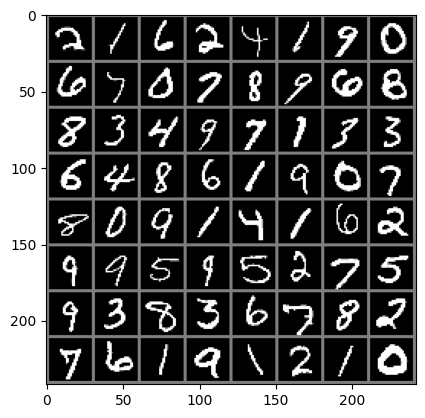

In [63]:
def imshow (img):
  img  = img/0.5 +0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()



imshow(torchvision.utils.make_grid(images))

In [64]:
# class_names = ['plane', 'car','bird','cat','deer','dog','frog','horse','ship','truck']
class_names = ['zero','one','two','three','four','five','six','seven','eight','nine']


In [65]:
class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu=nn.ReLU()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=8, kernel_size=(3,3), stride=1, padding=0)
        self.bn1=nn.BatchNorm2d(8)
        self.mp1=nn.MaxPool2d(kernel_size=(2,2),stride=2,padding=0)

        self.conv2=nn.Conv2d(in_channels=8,out_channels=16, kernel_size=(3,3), stride=1, padding=0)
        self.bn2=nn.BatchNorm2d(16)

        self.conv3=nn.Conv2d(in_channels=16,out_channels=32, kernel_size=(3,3), stride=1, padding=0)
        self.bn3=nn.BatchNorm2d(32)

        self.conv4=nn.Conv2d(in_channels=32,out_channels=64, kernel_size=(3,3), stride=1, padding=0)
        self.bn4=nn.BatchNorm2d(64)

        self.flatten=nn.Flatten()


        self.lin1=nn.Linear(in_features=3136, out_features=10)



    def forward(self,x):
        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu(x)
        x=self.mp1(x)

        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu(x)

        x=self.conv3(x)
        x=self.bn3(x)
        x=self.relu(x)

        x=self.conv4(x)
        x=self.bn4(x)
        x=self.relu(x)

        x=self.flatten(x)


        logits=self.lin1(x)


        return logits


In [66]:

batch_size =64
def train_one_epoch(dataloader, model,loss_fn, optimizer):
    model.train()
    track_loss=0
    num_correct=0
    for i, (imgs, labels) in enumerate(dataloader):
        imgs=imgs.to(device)
        labels=labels.to(device)
        pred=model(imgs)

        loss=loss_fn(pred,labels)
        track_loss+=loss.item()
        num_correct+=(torch.argmax(pred,dim=1)==labels).type(torch.float).sum().item()

        running_loss=round(track_loss/(i+(imgs.shape[0]/batch_size)),2)
        running_acc=round((num_correct/((i*batch_size+imgs.shape[0])))*100,2)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if i%100==0:
            print("Batch:", i+1, "/",len(dataloader), "Running Loss:",running_loss, "Running Accuracy:",running_acc)

    epoch_loss=running_loss
    epoch_acc=running_acc
    return epoch_loss, epoch_acc

def eval_one_epoch(dataloader, model,loss_fn):
    model.eval()
    track_loss=0
    num_correct=0
    with torch.no_grad():
        for i, (imgs, labels) in enumerate(dataloader):
            imgs=imgs.to(device)
            labels=labels.to(device)
            pred=model(imgs)
            loss=loss_fn(pred,labels)
            track_loss+=loss.item()
            num_correct+=(torch.argmax(pred,dim=1)==labels).type(torch.float).sum().item()
            running_loss=round(track_loss/(i+(imgs.shape[0]/batch_size)),2)
            running_acc=round((num_correct/((i*batch_size+imgs.shape[0])))*100,2)

            if i%100==0:
                print("Batch:", i+1, "/",len(dataloader), "Running Loss:",running_loss, "Running Accuracy:",running_acc)

    epoch_loss=running_loss
    epoch_acc=running_acc
    return epoch_loss, epoch_acc

model=MyNetwork()
model=model.to(device)
loss_fn=nn.CrossEntropyLoss()
lr=0.01
optimizer=torch.optim.SGD(params=model.parameters(), lr=lr,momentum=0.9)
# optimizer=torch.optim.Adam(params=model.parameters(), lr=lr)
n_epochs=3

for i in range(n_epochs):
    print("Epoch No:",i+1)
    train_epoch_loss, train_epoch_acc=train_one_epoch(train_loader,model,loss_fn,optimizer)
    val_epoch_loss, val_epoch_acc=eval_one_epoch(test_loader,model,loss_fn)
    print("Training:", "Epoch Loss:", train_epoch_loss, "Epoch Accuracy:", train_epoch_acc)
    print("Inference:", "Epoch Loss:", val_epoch_loss, "Epoch Accuracy:", val_epoch_acc)
    print("--------------------------------------------------")



Epoch No: 1
Batch: 1 / 938 Running Loss: 2.32 Running Accuracy: 12.5
Batch: 101 / 938 Running Loss: 0.35 Running Accuracy: 88.74
Batch: 201 / 938 Running Loss: 0.23 Running Accuracy: 92.71
Batch: 301 / 938 Running Loss: 0.18 Running Accuracy: 94.08
Batch: 401 / 938 Running Loss: 0.16 Running Accuracy: 94.93
Batch: 501 / 938 Running Loss: 0.14 Running Accuracy: 95.54
Batch: 601 / 938 Running Loss: 0.13 Running Accuracy: 95.98
Batch: 701 / 938 Running Loss: 0.12 Running Accuracy: 96.28
Batch: 801 / 938 Running Loss: 0.11 Running Accuracy: 96.53
Batch: 901 / 938 Running Loss: 0.1 Running Accuracy: 96.72
Batch: 1 / 157 Running Loss: 0.01 Running Accuracy: 100.0
Batch: 101 / 157 Running Loss: 0.05 Running Accuracy: 98.55
Training: Epoch Loss: 0.1 Epoch Accuracy: 96.77
Inference: Epoch Loss: 0.04 Epoch Accuracy: 98.77
--------------------------------------------------
Epoch No: 2
Batch: 1 / 938 Running Loss: 0.0 Running Accuracy: 100.0
Batch: 101 / 938 Running Loss: 0.04 Running Accuracy: 98

In [67]:
torch.save(model.state_dict(),"model_pth")

model = MyNetwork().to(device)
model.load_state_dict(torch.load("model_pth"))
model.eval()


<ipython-input-67-2ace97eb13b4>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model_pth"))


MyNetwork(
  (relu): ReLU()
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (mp1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lin1): Linear(in_features=3136, out_features=10, bias=True)
)

In [68]:
def test_model(dataloader,model):
  model.eval()
  predictions = []
  actual_labels = []
  with torch.no_grad():

    for i, (images, labels) in enumerate(dataloader):
      images  = images.to(device)
      labesl = labels.to(device)
      output = model(images)

      predicted_labels = torch.argmax(output, dim = 1)
      predictions.append(predicted_labels.cpu().numpy())
      actual_labels.append(labels.cpu().numpy())

    return predictions, actual_labels







In [69]:
test_predictions , test_labels = test_model(test_loader,model)
from sklearn.metrics import accuracy_score

test_predictions = np.concatenate(test_predictions)
test_labels = np.concatenate(test_labels)

test_accuracy = accuracy_score(test_labels,test_predictions)
print(f"Accuracy of the model is {test_accuracy*100:.3f}")


Accuracy of the model is 99.070
